## Profitability Stress Scenario - Inspired by Hamilton Era Financial Markets ##

Hamilton created a hybrid public-private bank, equivalent to a mdern day crypto clearing institution
or custodian like Anchorage. With an assumed 50% of revenue earned through custody fees, a large risk in earnings and thus capital growth (through earnings) relies on the market value of stored crypto assets. During Hamiltons lifetime (1755-1805), British consols experienced drawdowns between 30-40%, similar to previous crypto sell-offs, due to the American Revolution and Napoleonic Wars. We will stress the custodial earnings loss over a few scenarios (length, recovery) based on a drawdown similar to the British consols.

For additional stress, one can correlate BTC or ETH volatility with ETF inflows and outflows in order to predict trading fee volatility.

### Scenario Assumptions: ###
* AUC of $15 billion USD across high-value, low maintenance assets (BTC, ETH)
* AUC of $5 bllion USD across altcoins or higher complex assets
* Custody fee of 0.15% annually for lower maintenance assets
* Custody fee of 0.20% annually for altcoins or higher complex assets

### Baseline Scenario ###
Markets remain stable over the course of a year.

In [3]:
# Current Portoflio
BTC = 10000000000
ETH = 5000000000
DOGE = 3000000000
DOT = 2000000000

Annual_Fees = (BTC + ETH) * 0.0015 + (DOGE + DOT) * 0.002
print(f"Annual Fees: ${Annual_Fees:,.2f}")

Annual Fees: $32,500,000.00


In [9]:
# Import historical prices from csv file
import pandas as pd
folder_path = 'C:/Users/Admin/Documents/Anchorage/'  # Update this to your folder path
file_path = folder_path + 'historical_prices.csv'
historical_prices = pd.read_csv(file_path, index_col=0, parse_dates=True)

# Convert the price data to returns
returns = historical_prices.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = returns.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate the covariance matrix
covariance_matrix = returns.cov()
print("\nCovariance Matrix:")
print(covariance_matrix)

# Calculate the expected return of the portfolio
expected_returns = returns.mean()
weights = [0.5, 0.25, 0.15, 0.1]  # Weights for BTC, ETH, DOGE, DOT
portfolio_expected_return = weights @ expected_returns.values
print(f"\nExpected Portfolio Return: {portfolio_expected_return:.6f}")

# Calculate the portfolio variance
weights = [0.5, 0.25, 0.15, 0.1]  # Weights for BTC, ETH, DOGE, DOT
portfolio_variance = weights @ covariance_matrix.values @ weights
print(f"\nPortfolio Variance: {portfolio_variance:.6f}")


Correlation Matrix:
           BTC       ETH      DOGE       DOT
BTC   1.000000  0.802530  0.390436  0.648490
ETH   0.802530  1.000000  0.364685  0.705681
DOGE  0.390436  0.364685  1.000000  0.329611
DOT   0.648490  0.705681  0.329611  1.000000

Covariance Matrix:
           BTC       ETH      DOGE       DOT
BTC   0.000937  0.001014  0.001214  0.001075
ETH   0.001014  0.001706  0.001530  0.001579
DOGE  0.001214  0.001530  0.010322  0.001814
DOT   0.001075  0.001579  0.001814  0.002935

Expected Portfolio Return: 0.001885

Portfolio Variance: 0.001394


### Portoflio VaR ###

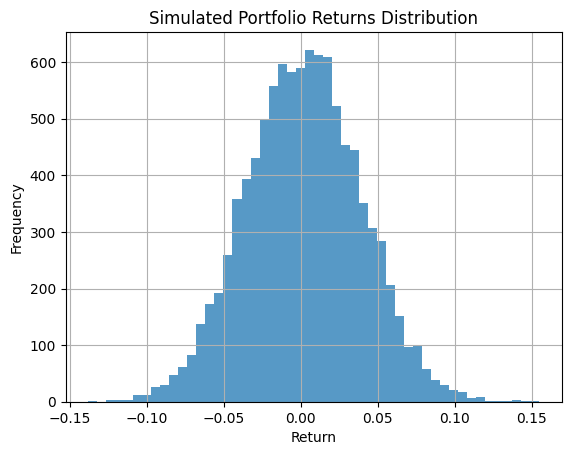


Daily Value at Risk (95% confidence): -0.058852
Annual Value at Risk (95% confidence): -0.934242


In [27]:
# Simulate future returns using Monte Carlo simulation
import numpy as np
num_simulations = 10000
simulated_returns = np.random.multivariate_normal(expected_returns.values, covariance_matrix.values, num_simulations)

# Plot the distribution of simulated portfolio returns
import matplotlib.pyplot as plt
simulated_portfolio_returns = simulated_returns @ weights
plt.hist(simulated_portfolio_returns, bins=50, alpha=0.75)
plt.title('Simulated Portfolio Returns Distribution')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Calculate the simulated portfolio returns
simulated_portfolio_returns = simulated_returns @ weights
# Calculate the Value at Risk (VaR) at 95% confidence level
VaR_95 = np.percentile(simulated_portfolio_returns, 5)
print(f"\nDaily Value at Risk (95% confidence): {VaR_95:.6f}")

# Convert daily VaR to annual VaR assuming 252 trading days
VaR_95_annual = VaR_95 * np.sqrt(252)
print(f"Annual Value at Risk (95% confidence): {VaR_95_annual:.6f}")

### Scenario 1 - Annual 35% drawdown with Full Recovery ###

In [28]:
# Calulate average portoflio value over the next year assuming 252 trading days
initial_portfolio_value = BTC + ETH + DOGE + DOT
total_fees = 0

daily_return = (1-.35)**(1/126) - 1  # Assuming a 35% drawdown over the 6 months
for day in range(126):
    initial_portfolio_value *= (1 + daily_return)
    total_fees += initial_portfolio_value * (0.0015 * 0.75 + 0.002 * 0.25)/252 # Assuming fees based on weights

daily_return = (1+.35)**(1/126) - 1  # Assuming a 35% recovery over the 6 months
for day in range(126):
    initial_portfolio_value *= (1 + daily_return)
    total_fees += initial_portfolio_value * (0.0015 * 0.75 + 0.002 * 0.25)/252 # Assuming fees based on weights

print(f"\nAverage Portfolio Value after 1 year: ${initial_portfolio_value:,.2f}")
print(f"Total Fees Paid over 1 year: ${total_fees:,.2f}")
print(f"Net Fees Lost after 1 year: ${Annual_Fees - total_fees:,.2f}")


Average Portfolio Value after 1 year: $17,550,000,000.00
Total Fees Paid over 1 year: $25,513,446.82
Net Fees Lost after 1 year: $6,986,553.18


### Scenario 2 - 35% drawdown over a 1 year period ###

In [29]:
# Calulate average portoflio value over the next year assuming 252 trading days
initial_portfolio_value = BTC + ETH + DOGE + DOT
total_fees = 0

daily_return = (1-.35)**(1/252) - 1  # Assuming a 35% drawdown over the 6 months
for day in range(252):
    initial_portfolio_value *= (1 + daily_return)
    total_fees += initial_portfolio_value * (0.0015 * 0.75 + 0.002 * 0.25)/252 # Assuming fees based on weights

print(f"\nAverage Portfolio Value after 1 year: ${initial_portfolio_value:,.2f}")
print(f"Total Fees Paid over 1 year: ${total_fees:,.2f}")
print(f"Net Fees Lost after 1 year: ${Annual_Fees - total_fees:,.2f}")


Average Portfolio Value after 1 year: $13,000,000,000.00
Total Fees Paid over 1 year: $26,382,848.10
Net Fees Lost after 1 year: $6,117,151.90
